In [38]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

In [39]:
image = cv.imread("twinkle.jpg")

# plt.figure(figsize=(6, 9))
# plt.imshow(image)

In [40]:
grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
bandw = cv.threshold(grayscale, 0, 1, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
# plt.figure(figsize=(10, 15))
# plt.imshow(bandw, cmap="gray")

In [41]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(bandw)
components = stats[
    :,
    [
        cv.CC_STAT_LEFT,
        cv.CC_STAT_TOP,
        cv.CC_STAT_WIDTH,
        cv.CC_STAT_HEIGHT,
    ],
]
components = pd.DataFrame(components, columns=["x", "y", "w", "h"])

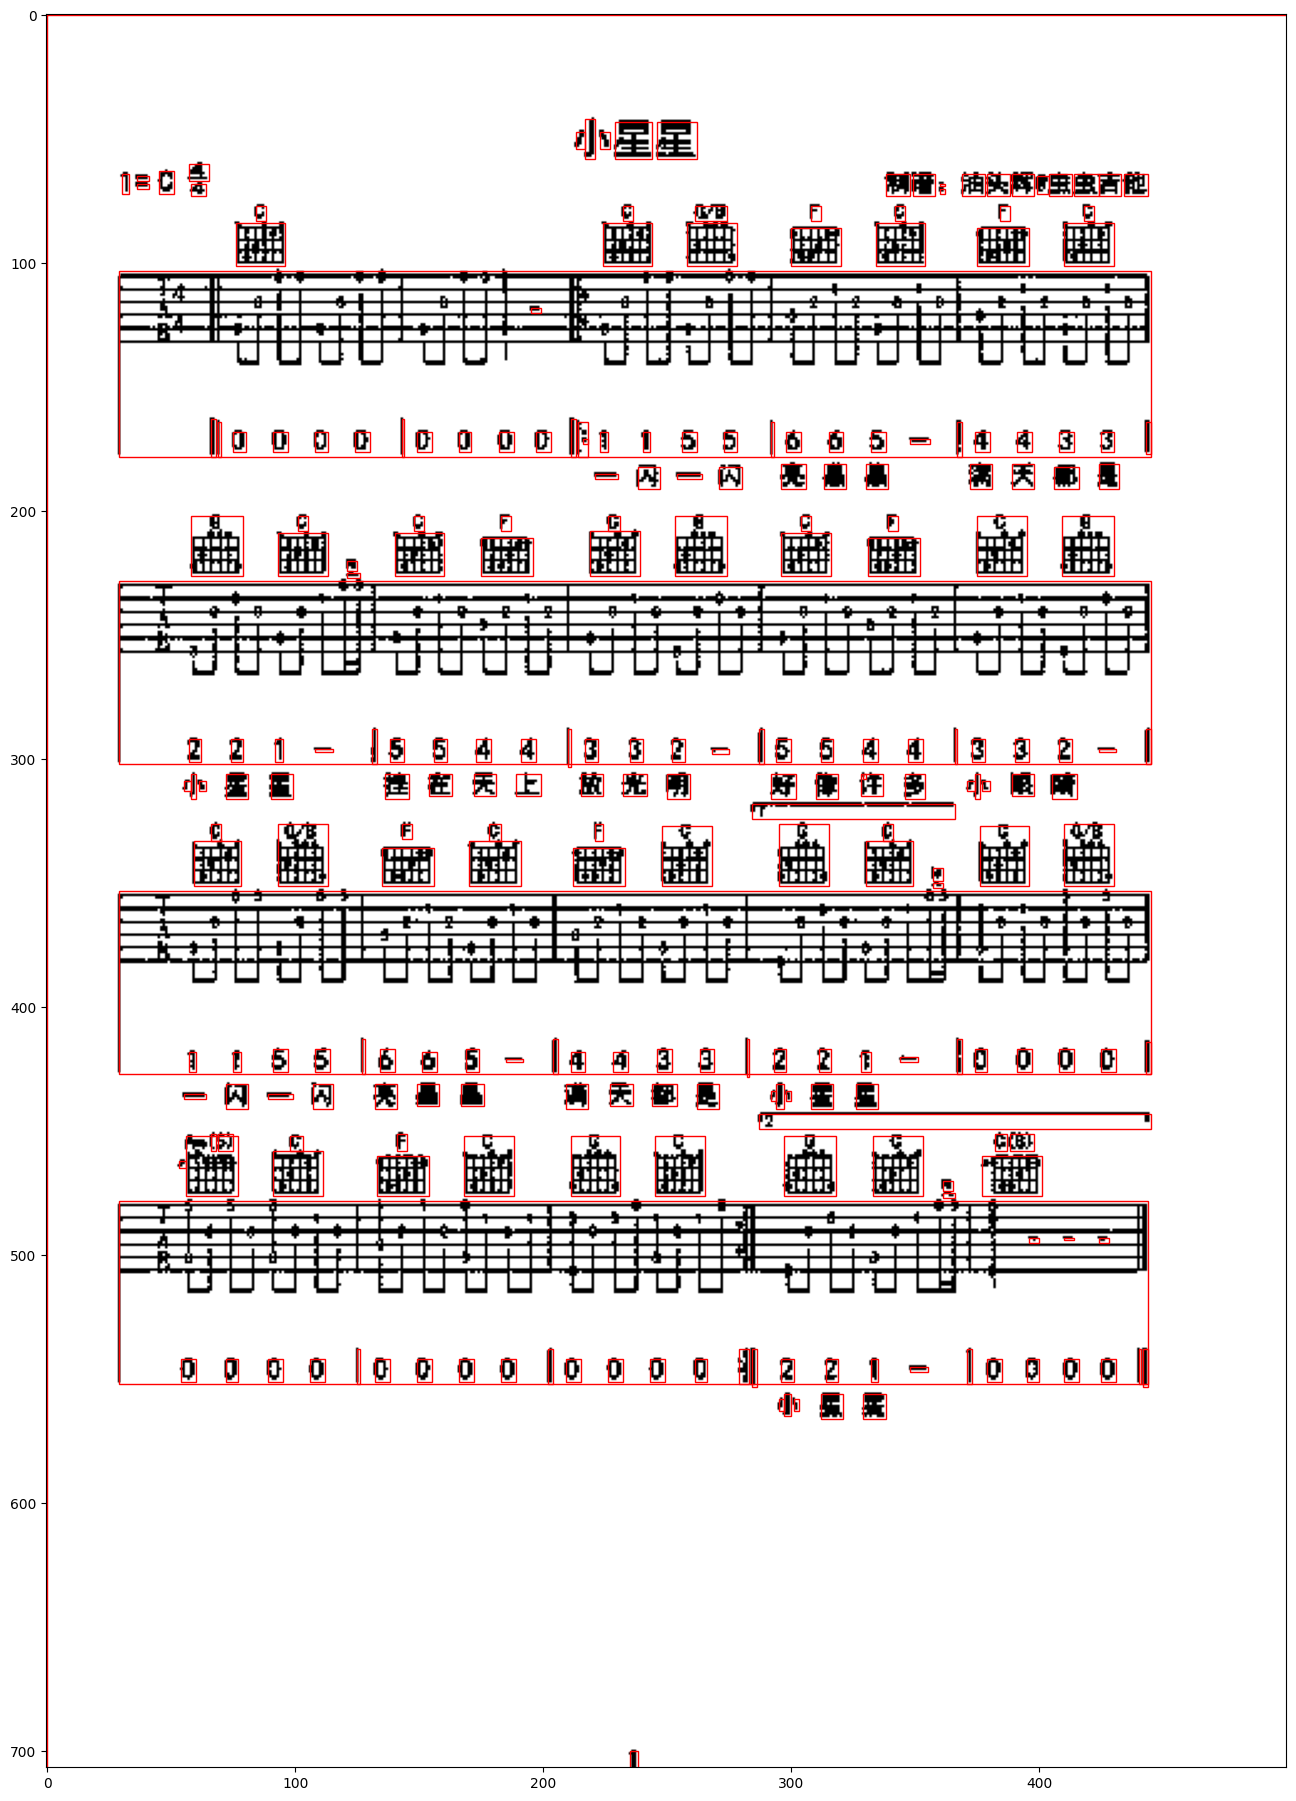

In [42]:
fig, ax = plt.subplots(figsize=(16, 24))
ax.imshow(bandw, cmap="gray_r")
for i, row in components.iterrows():
    patch = patches.Rectangle(
        (row.x, row.y), row.w, row.h, linewidth=1, edgecolor="r", facecolor="none"
    )
    ax.add_patch(patch)
fig.show()

In [43]:
components["x2"] = components.x + components.w
components["y2"] = components.y + components.h

In [53]:
def get_components(image):
    """Get the individual connected components of an image

    Returns:
        a three dimensional numpy array with dimension (component, y, x)
    """

    processed = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    processed = cv.threshold(grayscale, 0, 1, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
    _, _, stats, _ = cv.connectedComponentsWithStats(processed)
    components = pd.DataFrame(
        stats[
            :,
            [
                cv.CC_STAT_LEFT,
                cv.CC_STAT_TOP,
                cv.CC_STAT_WIDTH,
                cv.CC_STAT_HEIGHT,
            ],
        ],
        columns=["x", "y", "w", "h"],
    )
    components["x2"] = components.x + components.w
    components["y2"] = components.y + components.h

    return [processed[r.y : r.y2, r.x : r.x2] for _, r in components.iterrows()]

In [54]:
get_components(cv.imread("twinkle2.jpg"))[:5]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [0, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 0]], dtype=uint8),
 array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0